In [6]:
import tensorflow as tf
import pandas as pd
import scipy as scp
import scipy.io as io
import numpy as np


In [7]:
def read_raw(refname='REFERENCE', dir='./raw/'):
    label_dict = {
        'N':0,
        'A':1,
        'O':2,
        '~':3
    }

    data = []
    label = []
    lens = []
    annotations = open(dir+refname+'.csv', 'r').read().splitlines()
    for i, line in enumerate(annotations):
        fname, label_str = line.split(',')

        x = io.loadmat(dir+fname+'.mat')['val']\
            .astype(np.float32).squeeze()
        # Normal
        # x -= x.mean()
        # x /= x.std()

        data.append(x)

        y = label_dict[label_str]
        label.append(y)

        lens.append(len(x))
        if i%50==0:
            print('\rReading files: %05d   ' % i, end='', flush=True)

    print('\rReading files: %05d   ' % i, end='', flush=True)
    assert(len(label) == len(data) == len(lens))
    print('\nReading successful!')
    data_size = len(data)
    data = np.array(data)
    label = np.array(label)
    lens = np.array(lens)
    class_hist = np.histogram(label, bins=len(label_dict))[0]

    return data, label, class_hist, refname

In [34]:
original = read_raw('REFERENCE', dir='./raw/training2017/')



Reading files: 08527   
Reading successful!


In [35]:
normal = data[label==0]
af = data[label==1]
other = data[label==2]
noise = data[label==3]

In [40]:
np.random.rand(10)

array([ 0.62258989,  0.61878065,  0.54347265,  0.39434464,  0.09756665,
        0.71582419,  0.82971516,  0.94031139,  0.92294546,  0.30078347])

In [91]:
def augment(data, num_samples, alfa=.01, beta=.01):
    res = []
    res_lens = []
    for it in range(num_samples):
        sample = data[it % len(data)]
        # uni noise
        multiplicative_noise = np.random.randn(len(sample)) * alfa + 1
        # normal noise
        additive_noise = np.random.randn(len(sample)) * sample.std() * beta
        #additive_noise = 0
        res.append(sample * multiplicative_noise + additive_noise)
        res_lens.append(len(sample))
        
    return res, res_lens

In [137]:
aug_af = augment(af, 2, .01, .01)

In [120]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [127]:
with tf.Session() as sess:
    tf.spectral.fft2d

InvalidArgumentError: No OpKernel was registered to support Op 'FFT' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: FFT_1 = FFT[](FFT_1/input)]]

Caused by op 'FFT_1', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-127-6cf97cfbb84a>", line 2, in <module>
    print(tf.spectral.fft([1, 2, 3]).eval())
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_spectral_ops.py", line 141, in fft
    result = _op_def_lib.apply_op("FFT", input=input, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'FFT' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: FFT_1 = FFT[](FFT_1/input)]]


<IPython.core.display.Javascript object>


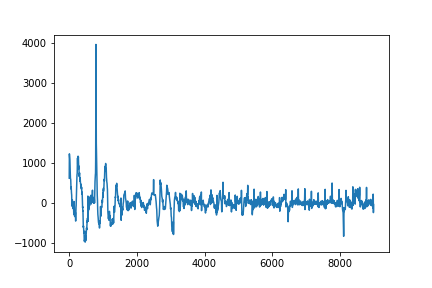

<IPython.core.display.Javascript object>


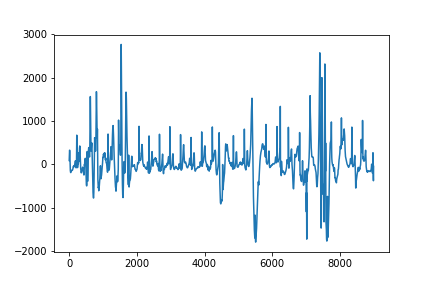

<IPython.core.display.Javascript object>


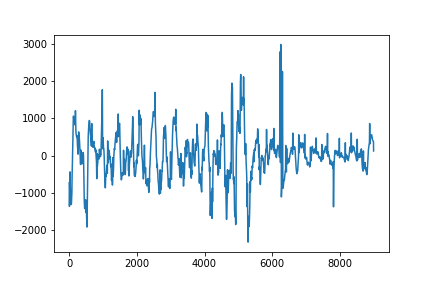

<IPython.core.display.Javascript object>


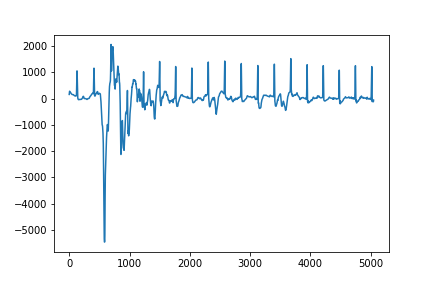

<IPython.core.display.Javascript object>


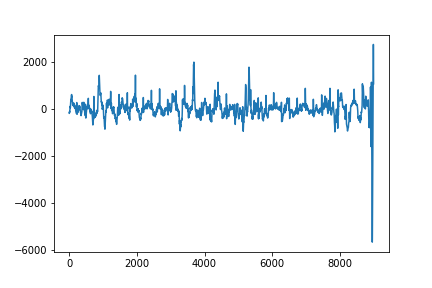

<IPython.core.display.Javascript object>


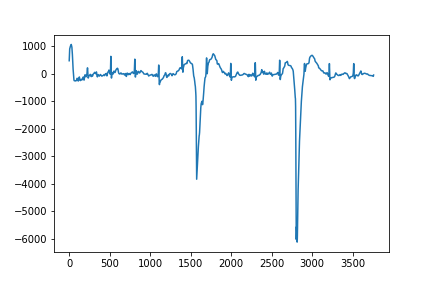

<IPython.core.display.Javascript object>


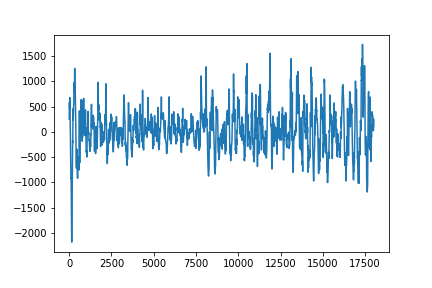

<IPython.core.display.Javascript object>


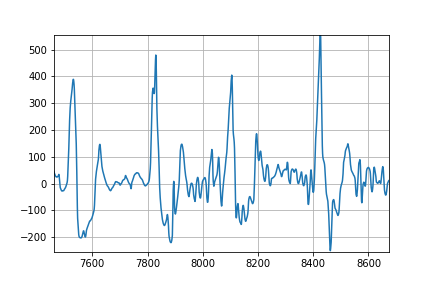

<IPython.core.display.Javascript object>


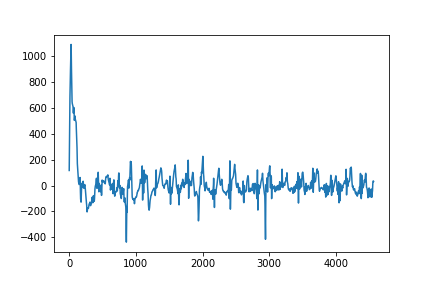

<IPython.core.display.Javascript object>


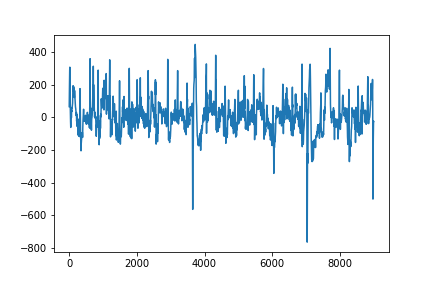

In [125]:
for i in range(10):
    plt.figure(i)
    plt.plot(noise[i])

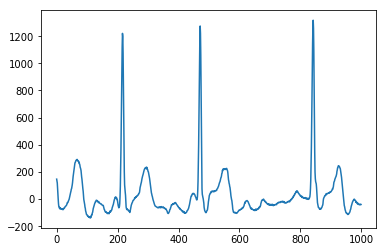

In [110]:
plt.plot(aug_af[0][0][3000:4000])

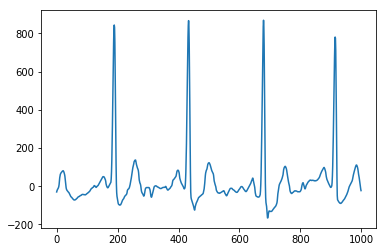

In [87]:
plt.plot(normal[0][3000:4000])

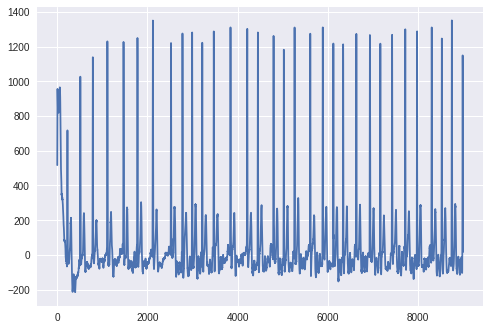

In [138]:
plt.plot(aug_af[0][0])

In [139]:
np.mean((af[0]-aug_af[0][0])**2)

9.4766337460701067

In [32]:
class_hist

array([5050,  738, 2456,  284])

In [18]:
df = pd.DataFrame(data={'Sequence':data, 'label':label})
df_labels = df['label']

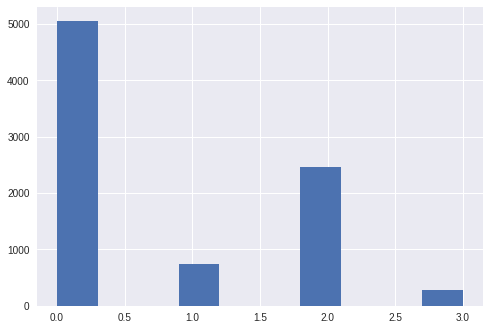

In [133]:
%matplotlib inline
import seaborn as sns
df_labels.hist()